<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=10>Data Analytics on Cloud</center></font></h1>
<h1><center>Mentored Learning Session - Week 2</center></h1>




<center><img src="http://api.openverse.engineering/v1/images/d1e2c1e1-753e-4698-8b07-ac072ef0f65a/thumb/" width="1000" height="600"></center>

<b><h2><center>Sociout Case Study</center></h2></b>

## Problem Definition

### **Business Context**
**Sociout** is an online social networking service that has over 100 million Active Users globally accessing the platform through the mobile application and the online website. Users registered on the service can create their personalized profiles and can post text, photos, and multimedia which are shared with their connections in the platform. More than 80% of the total users regularly use Sociout through the mobile application that is available on both android and iOS. 

Sociout's mobile application regularly receives feedback ratings from new users that it leverages to continuously improve its services. Due to uncertain bugs in the features, abrupt crashes due to technical issues in the server, the user engagement is hampered and this affects the app's user ratings and business. The analytics manager of the company wants to set up a Statistical Process in place to automatically monitor the user feedback to detect abnormal dips in average ratings and alert the tech team to investigate and fix the issues.

### **Objective**
Being a Data Scientist at Sociout, your task is to create an Anomaly Detection Algorithm using Statistical Process Control to monitor incoming user ratings and alert the Tech Team to take appropriate actions if the ratings continue to drop.

#### **Solution Approach**
Based on previous data it has been known that on a typical day, Sociout's mobile app receives an **average rating** of **4.25** on a scale of 1 to 5 with a **standard deviation** of **0.5**. Using this information, we can define a set of rules which can alert the Tech Team to take appropriate actions whenever the ratings drop.


### Data Dictionary

**user_ratings.csv** containing daily average ratings have been provided to you to create and test out the Anomaly Detection Algorithm. This dataset has around nine months of daily average ratings.

* timestamp: Date for which the average rating was calculated.
* average_rating: Daily average of ratings

## 1.0 Defining the Control Limits

The mobile app typically receives an average rating of **4.5** every day with a standard deviation of **0.5**. As the company is concerned only about the dips in rating and not the spikes, we shall calculate only the control limits below the mean as shown below:

$\mu$ = 4.25

$\mu$ - $\sigma$ = 3.75

$\mu$ - 2$\sigma$ = 3.25

$\mu$ - 3$\sigma$ = 2.75

### 1.1 Import libraries


In [ ]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for plotting graphs
import matplotlib.pyplot as plt
%matplotlib inline

# Import libraries for simulating real-time detection
import time
# uncomment the below installation code if importing colorama throws an error.
#!pip install colorama 
import colorama
from colorama import Fore,Style

### 1.2 Calculating the Control Limits

In [ ]:
# Create variables to store mu and sigma
mu = 4.25
sigma = 0.5

In [ ]:
# Create variables to store the control limits
mu_min_1sigma = mu - sigma

mu_min_2sigma = mu - 2*sigma

mu_min_3sigma = mu - 3*sigma

### 1.3 Function to create SPC chart

In [ ]:
def plot_spc():
    '''
    Function to plot a Statistical Process Control chart. When used alone, 
    it plots an empty canvas with the control limits specified
    '''
    # define x and y lables
    plt.ylabel('daily average rating')
    plt.xlabel('timestamp')

    # Create a x-line for each control limit
    plt.axhline(y=mu, color='#003459', label='Mean = '+ str(mu))
    plt.axhline(y=mu_min_1sigma, linestyle='--', color='#252627', label='1-sigma LL = '+ str(mu_min_1sigma))
    plt.axhline(y=mu_min_2sigma, linestyle='--', color='#4b88a2', label='2-sigma LL = '+ str(mu_min_2sigma))
    plt.axhline(y=mu_min_3sigma, linestyle='--', color='#BB0A21', label='LCL = '+ str(mu_min_3sigma))
    
    # Plot the above lines with a legend
    plt.legend()
    plt.show()

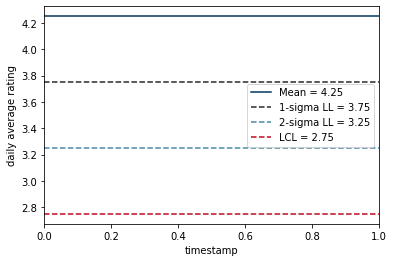

In [ ]:
# Plot the empty SPC chart
plot_spc()

## 2.0 Read Data

In [ ]:
# Upload the dataset into google colab's working directory
from google.colab import files
files.upload()

df = pd.read_csv('user_ratings.csv')    

Saving user_ratings.csv to user_ratings.csv


In [ ]:
# display first few rows
df.head()

,timestamp,avg_rating
0,02/17/2008,4.29
1,02/18/2008,4.12
2,02/19/2008,4.35
3,02/20/2008,4.41
4,02/21/2008,4.22


In [ ]:
# convert timestamp to datetime format
df['timestamp']=pd.to_datetime(df.timestamp)

In [ ]:
# set timestamp as the index and remove the existing indes
df.set_index('timestamp',drop=True,inplace=True)

In [ ]:
# display the dataset again
df.head()

,avg_rating
timestamp,
2008-02-17,4.29
2008-02-18,4.12
2008-02-19,4.35
2008-02-20,4.41
2008-02-21,4.22


## 3.0 Defining the rules for Anomaly Detection

### 3.1 Function to detect Anomalies



**Note:** If you are learning this for the first time, it is recommended that you just define this function for now and move on to the further sections. The way this function was built will become clear as you understand how it works in the coming sections.

In [ ]:
def detect_anomaly(n):
    '''
    Function to flag anomalies in the data. This function can be used to flag
    3 types of anomalies:

    0 - Show just the data
    1 - Points that are between mu - 1*sigma and mu - 2*sigma
    2 - Points that are between mu - 2*sigma and mu - 3*sigma
    3 - Points that go beyond the LCL (beyond mu - 3*sigma)
    4 - All 1, 2 and 3 mentioned above at once
    '''

    # Initialize the filters for the 3 types of Anomalies
    x = df['avg_rating']
    filter_1 = ( (x < mu_min_1sigma) & (x > mu_min_2sigma) )
    filter_2 = ( (x < mu_min_2sigma) & (x > mu_min_3sigma) )
    filter_3 = (x < mu_min_3sigma)
    
    # Show just the trend
    if n==0:
        fig, ax = plt.subplots(figsize = (20, 9))
        ax.plot(df['avg_rating'], linestyle='-', marker='.', color='#3A4E48', linewidth=1)
        plot_spc()
    
    # Points that are between mu - 1*sigma and mu - 2*sigma
    elif n==1:
        fig, ax = plt.subplots(figsize = (20, 9))
        ax.plot(x[filter_1], 'o', color='#A4031F', markersize=7)
        ax.plot(df['avg_rating'], linestyle='-', marker='.', color='#3A4E48', linewidth=1)
        plot_spc()
    
    # Points that are between mu - 2*sigma and mu - 3*sigma
    elif n==2:
        fig, ax = plt.subplots(figsize = (20, 9))
        ax.plot(x[filter_2], 'o', color='#A4031F', markersize=7)
        ax.plot(df['avg_rating'], linestyle='-', marker='.', color='#3A4E48', linewidth=1)
        plot_spc()
    
    # Points that go beyond LCL (beyond mu - 3*sigma)
    elif n==3:
        fig, ax = plt.subplots(figsize = (20, 9))
        ax.plot(x[filter_3], 'o', color='#A4031F', markersize=7)
        ax.plot(df['avg_rating'], linestyle='-', marker='.', color='#3A4E48', linewidth=1)
        plot_spc()

    # All 1, 2 and 3 mentioned above at once
    elif n==4:
        fig, ax = plt.subplots(figsize = (20, 9))
        ax.plot(x[filter_1], 'o', color='#A4031F', markersize=7)
        ax.plot(x[filter_2], 'o', color='#A4031F', markersize=7)
        ax.plot(x[filter_3], 'o', color='#A4031F', markersize=7)
        ax.plot(df['avg_rating'], linestyle='-', marker='.', color='#3A4E48', linewidth=1)
        plot_spc()

### 3.2 Identifying patterns in the trend

**Ask Yourself:** What patterns do you see in the below data? Think about how to create an algorithm to flag ratings that are not following the normal path and should be investigated.

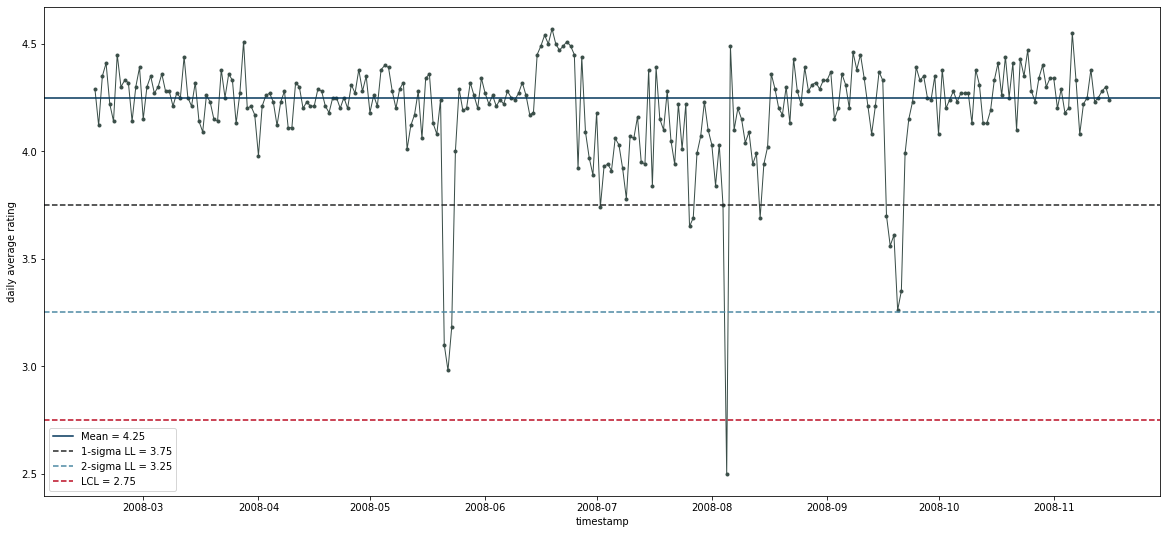

In [ ]:
detect_anomaly(0)

### 3.3 Flagging Anomalies in the data

There are three kinds of anomalies that can be flagged:

**Type 1**: When the datapoint is between $\mu-\sigma$ and $\mu - 2\sigma$

**Type 2**: When the datapoint is between $\mu-2\sigma$ and $\mu - 3\sigma$

**Type 3**: When the datapoint goes below the LCL ($\mu - 3\sigma$)

You can change the number while calling the function to see the anomalies get flagged as below.

* 0 - Show just the trend
* 1 - Points that are between $\mu-\sigma$ and $\mu - 2\sigma$
* 2 - Points that are between $\mu-2\sigma$ and $\mu - 3\sigma$
* 3 - Points that go beyond LCL ($\mu - 3\sigma$)
* 4 - All types of anomalies mentioned above at once

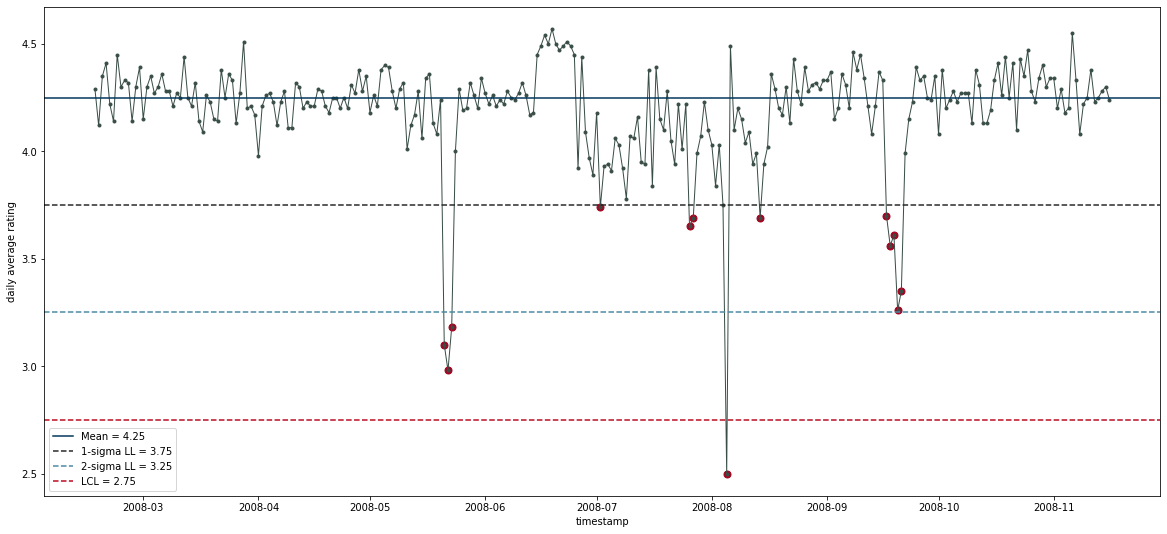

In [ ]:
detect_anomaly(4)

## 4.0 Simulating real-time Anomaly Detection

Let's set the ground rules for sending alerts.

**Problem 1**: The first kind of alert we need to send to the tech team is when the average ratings are persistently low. They can check the app's overall performance and make sure that all of the app's features are functioning as expected. This needs to be done when:

- More than 4 data points occur continuously between $\mu - \sigma$ and $\mu - 2\sigma$

- More than 2 data points occur continuously between $\mu - 2\sigma$ and $\mu - 3\sigma$

**Problem 2**: The second kind of alert we need to send to the tech team is when the average rating on any day drops below the LCL ($\mu - 3\sigma$). Along with checking the performance of the app and potential bugs in the features, the tech team can send an in-app communication to the users requesting for a description of why they are unhappy with the app.

### 4.1 Function to simulate real-time Anomaly Detection

**Note:** It's recommended that you define this function and then jump to section **4.2** and see Anomaly Detection in Action first. You can then come back to see how this function accomplishes that.

In [ ]:
def simulateAD(df):

  # Initialize counters to Zero
  type_1_cnt = type_2_cnt = 0

  for i in range(len(df)): # for every datapoint that comes in, do the below
      
      # Capture the rating and the timestamp
      rating= df['avg_rating'][i]
      tms = str(df.index[i])
      
      # Initialize the Anomaly Type Flags to Zero
      type_1 = type_2 = type_3 = 0

      # Points that are between mu - 1*sigma and mu - 2*sigma
      if ( (rating< mu_min_1sigma) and (rating> mu_min_2sigma) ):
        type_1 = 1
      
      # Points that are between mu - 2*sigma and mu - 3*sigma
      if ( (rating< mu_min_2sigma) and (rating> mu_min_3sigma) ):
        type_2 = 1

      # Points that go beyond LCL (beyond mu - 3*sigma)
      if (rating< mu_min_3sigma): 
        type_3 = 1
      
      # Message / Action for Type 1 Anomaly
      if type_1 == 1:
        type_2_cnt = 0 # reset type 2 counter
        if type_1_cnt >= 4:
          print(tms +': ' +'Daily average rating is '+str(rating) +'\033[1m(ALERT! Do a maintenance check of the app features and general performance)', Style.RESET_ALL)
        else:
          print(tms + ': ' +'Daily average rating is ' + str(rating) + ' (Ratings dropping! Stand-by to do a maintenance check)')
        type_1_cnt = type_1_cnt + 1
      
      # Message / Action for Type 2 Anomaly
      elif type_2 == 1:
        type_1_cnt = 0 # reset type 1 counter
        if type_2_cnt >= 2:
          print(tms + ': ' +'Daily average rating is '+str(rating) +'\033[1m(ALERT! Do a maintenance check of the app features and general performance)', Style.RESET_ALL)
        else:
          print(tms + ': ' +'Daily average rating is ' + str(rating) + ' (Ratings dropping! Stand-by to do a maintenance check)')
        type_2_cnt = type_2_cnt + 1
      
      # Message / Action for Type 3 Anomaly
      elif type_3 == 1:
        type_1_cnt = type_2_cnt = 0 # reset both type 1 and type 2 counters
        print(tms + ': ' + Fore.RED + "\033[1m[!] CRITICAL: Daily average rating has dropped below limits:", str(rating), Style.RESET_ALL)
        
      # Normal Functioning
      else:
        type_1_cnt = type_2_cnt = 0 # reset both type 1 and type 2 counters
        print(tms + ': ' + 'Daily average rating is '+str(rating) + ' (within stable range)')
        
      # In real time, each datapoint would come in every day
      # As we cannot wait so long, lets scale that down to 0.5 seconds
      time.sleep(0.5)

***

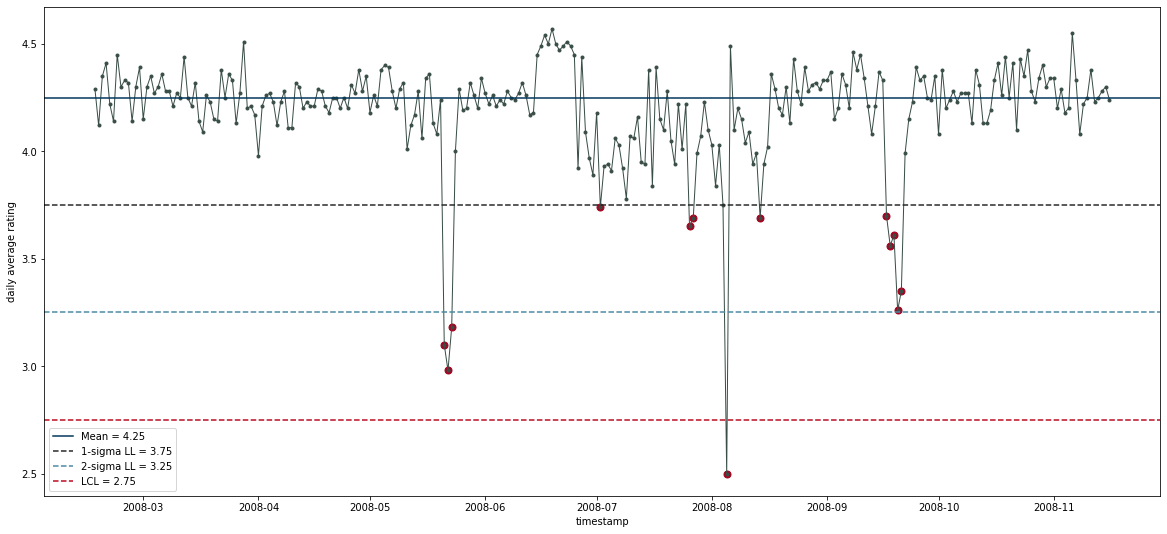

2008-02-17 00:00:00: Daily average rating is 4.29 (within stable range)
2008-02-18 00:00:00: Daily average rating is 4.12 (within stable range)
2008-02-19 00:00:00: Daily average rating is 4.35 (within stable range)
2008-02-20 00:00:00: Daily average rating is 4.41 (within stable range)
2008-02-21 00:00:00: Daily average rating is 4.22 (within stable range)
2008-02-22 00:00:00: Daily average rating is 4.14 (within stable range)
2008-02-23 00:00:00: Daily average rating is 4.45 (within stable range)
2008-02-24 00:00:00: Daily average rating is 4.3 (within stable range)
2008-02-25 00:00:00: Daily average rating is 4.33 (within stable range)
2008-02-26 00:00:00: Daily average rating is 4.32 (within stable range)
2008-02-27 00:00:00: Daily average rating is 4.14 (within stable range)
2008-02-28 00:00:00: Daily average rating is 4.3 (within stable range)
2008-02-29 00:00:00: Daily average rating is 4.39 (within stable range)
2008-03-01 00:00:00: Daily average rating is 4.15 (within stable r

In [ ]:
detect_anomaly(4) 
simulateAD(df)



---



---

